In [7]:
import tensorflow as tf

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:08<00:00, 124MB/s] 
100% 1.06G/1.06G [00:08<00:00, 130MB/s]


In [5]:
 import zipfile
 zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
 zip_ref.extractall('/content')
 zip_ref.close()

In [8]:
train_df = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [9]:
test_df = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


# Normalize

In [10]:
def process(image,label):
  image = tf.cast(image/255.,tf.float32)
  return image,label
train_ds = train_df.map(process)
test_ds = test_df.map(process)

In [17]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,BatchNormalization,Dropout

In [12]:
from tensorflow.keras import Sequential

# Building Model CNN

In [18]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(5,5),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(5,5),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2),2,'valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 252, 252, 32)      2432      
                                                                 
 batch_normalization (Batch  (None, 252, 252, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 126, 126, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 122, 122, 64)      51264     
                                                                 
 batch_normalization_1 (Bat  (None, 122, 122, 64)      256       
 chNormalization)                                                
                                                      

In [21]:
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
625/625 [==============================] - 97s 147ms/step - loss: 1.5123 - accuracy: 0.5740 - val_loss: 0.6637 - val_accuracy: 0.6050
Epoch 2/5
625/625 [==============================] - 83s 132ms/step - loss: 0.6258 - accuracy: 0.6561 - val_loss: 0.6547 - val_accuracy: 0.6082
Epoch 3/5
625/625 [==============================] - 80s 128ms/step - loss: 0.5602 - accuracy: 0.7128 - val_loss: 0.4987 - val_accuracy: 0.7554
Epoch 4/5
625/625 [==============================] - 83s 133ms/step - loss: 0.4882 - accuracy: 0.7661 - val_loss: 0.9373 - val_accuracy: 0.5558
Epoch 5/5
625/625 [==============================] - 83s 133ms/step - loss: 0.4483 - accuracy: 0.7966 - val_loss: 0.6522 - val_accuracy: 0.7068


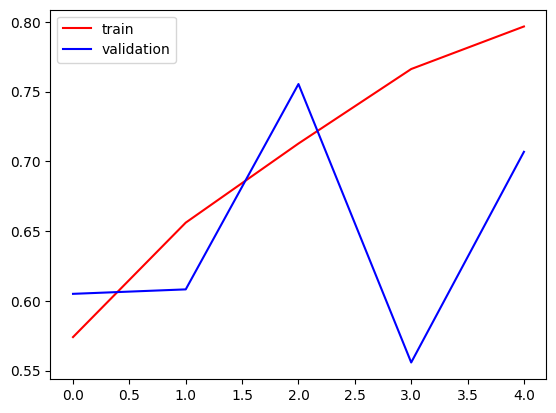

In [24]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()

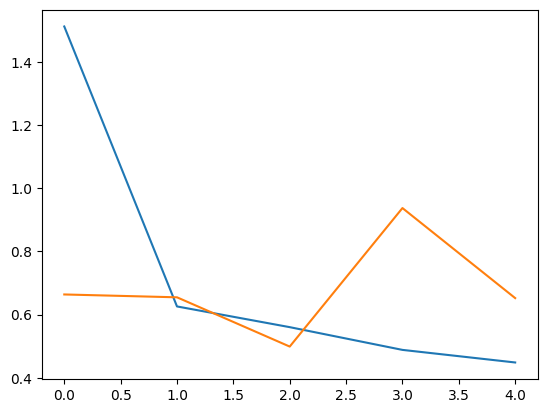

In [29]:
#Loss Graph
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')

In [30]:
# Prediction

In [31]:
import cv2

In [32]:
test_img = cv2.imread('/content/cat.jpg')

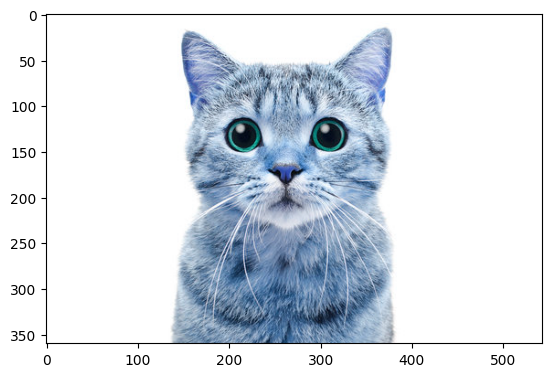

In [33]:
plt.imshow(test_img)

In [34]:
# Reshaping the Image
test_img.shape

(360, 543, 3)

In [35]:
test_img=cv2.resize(test_img,(256,256))

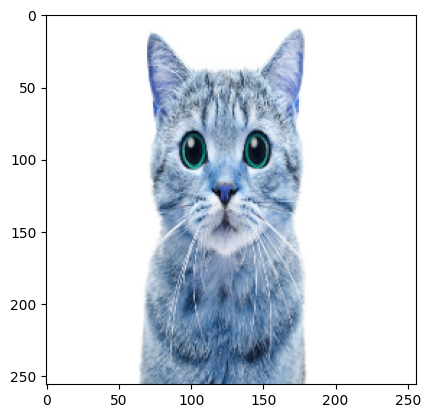

In [36]:
plt.imshow(test_img)

In [37]:
test_input = test_img.reshape((1,256,256,3))

In [38]:
## Zero - Cat and One - Dog
model.predict(test_input)

1/1 [==============================] - 1s 622ms/step


array([[0.]], dtype=float32)

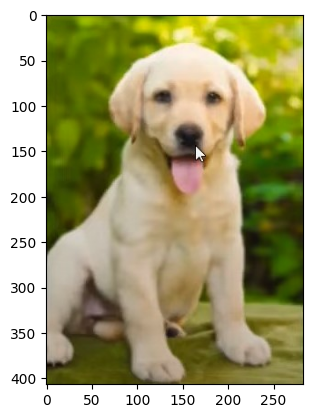

In [53]:
#Dog
test_img2 = cv2.imread('/content/dogg.jpg')
plt.imshow(test_img2)

In [54]:
test_img2 = cv2.resize(test_img2,(256,256))
test_input_dog =test_img2.reshape((1,256,256,3))

In [55]:
model.predict(test_input_dog)

1/1 [==============================] - 0s 23ms/step


array([[1.]], dtype=float32)